# Table of Contents

- [Introduction](#introduction)
- [Data Dictionary](#data-dictionary)
- [Data Overview](#data-overview)
- [Data Cleaning](#data-cleaning)
    - [Cleaning and Mapping Yes/No Columns](#cleaning-and-mapping-yes-no-columns)
    - [Cleaning and Mapping Checkbox Columns](#cleaning-and-mapping-checkbox-columns)
    - [Cleaning the Ranking Columns](#cleaning-the-ranking-columns)
- [Star Wars Highest-Ranked Movie](#star-wars-highest-ranked-movie)
- [Star Wars Most Viewed Movie](#star-wars-most-viewed-movie)
- [Exploring the Data by Binary Segments](#exploring-the-data-by-binary-segments)
    - [The Highest Ranked and Viewed Movie by Gender](#the-highest-ranked-and-viewed-movie-by-gender)
    - [Comparison Between Star Wars and Non Star Wars Fans](#comparison-between-star-wars-and-non-star-wars-fans)
    - [Comparison Between Star Trek and Non Star Trek Fans](#comparison-between-star-trek-and-non-star-trek-fans)
- [Star Wars Analysis Based on Education Level](#star-wars-analysis-based-on-education-level)
- [Star Wars Analysis Based on Geographic Location](#star-wars-analysis-based-on-geographic-location)
- [Conclusion](#conclusion)


# Introduction

The objective of this analysis is to answer some questions by the [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) team about Star Wars fans. While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, FiveThirtyEight team wondered whether the rest of Amearica realized that [The Empire Strikes Back](https://en.wikipedia.org/wiki/The_Empire_Strikes_Back) is clearly the best of the bunch.

To do this, they surveyed _Star Wars_ fans using the online tool SurveyMonkey and received 835 total responses which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). We will clean and segment the data to get insights on the notable trends of the audience alignment towards Star Wars franchise. The baseline of the analysis will further narrow down to specific factors such as gender, demographic, fanship, and education level of the audience.

# Data Dictionary

|Variable|Description|
|--------|-----------|
|RespondentID|An anonymized ID for the respondent|
|Gender|the respondent's gender|
|Age|the respondent's age|
|Household Income|the respondent's income|
|Education|the respondent's education level|
|Location (Census Region)|the respondent's location|
|Have you seen any of the 6 films in the Star Wars franchise?|a Yes or No response|
|Do you consider yourself to be a fan of the Star Wars film franchise?|a Yes or No response|

# Data Overview

In [8]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib to display plots inline
%matplotlib inline

In [9]:
# Read in the star_wars csv into pandas
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [10]:
# Explore the first 10 columns of the dataset
pd.options.display.max_columns = 40 #set the maximum number of columns to display
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [11]:
star_wars.shape

(1186, 38)

The data has 38 columns ranging from demographic attributes:
- `Gender`
- `Age`
- `Household Income`
- `Education`
- `Location (Census Region)`

Option columns of 'Yes/No answer' questions
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`
- `Are you familiar with the Expanded Universe?`
- `Do you consider yourself to be a fan of the Expanded Universe?`
- `Do you consider yourself to be a fan of the Star Trek franchise?`

Columns containing answers pertaining to Star Wars movies
- `Which of the following Star Wars films have you seen?`
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`
- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.`
- `Which character shot first?`

In [13]:
# Reviewing the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Data Cleaning

## Cleaning and Mapping Yes/No Columns

In [16]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

In [17]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: count, dtype: int64

Above we can see that `Do you consider yourself to be a fan of the Star Wars film franchise?` column has 350 respondents who decided not to answer the question.

Below, we're going to _map_ the Yes/No questions to in both the columns to a _Boolean type_

In [19]:
# Mapping Yes/No to the columns to Boolean type True/False
yes_no = {'Yes': True,
          'No': False}

# Looping over the two columns for simplified mapping
for col in ['Have you seen any of the 6 films in the Star Wars franchise?', 
            'Do you consider yourself to be a fan of the Star Wars film franchise?',
           'Do you consider yourself to be a fan of the Star Trek franchise?']:
    star_wars[col] = star_wars[col].map(yes_no)
    
# Display the first 5 columns to verify that the mapping was applied
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and Mapping Checkbox Columns

In [21]:
# Mapping dictionary for converting 
movies_mapper = {'Star Wars: Episode I  The Phantom Menace': True,
                 'Star Wars: Episode II  Attack of the Clones': True,
                 'Star Wars: Episode III  Revenge of the Sith': True,
                 'Star Wars: Episode IV  A New Hope': True,
                 'Star Wars: Episode V The Empire Strikes Back': True,
                 'Star Wars: Episode VI Return of the Jedi': True,
                 np.nan: False
}


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_mapper)

In [22]:
# Renaming the columns to look more intuitive
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                                      'Unnamed: 4': 'seen_2',
                                      'Unnamed: 5': 'seen_3',
                                      'Unnamed: 6': 'seen_4',
                                      'Unnamed: 7': 'seen_5',
                                      'Unnamed: 8': 'seen_6'
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

In [24]:
# Renaming the column to more descriptive names
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                                      'Unnamed: 10': 'ranking_2',
                                      'Unnamed: 11': 'ranking_3',
                                      'Unnamed: 12': 'ranking_4',
                                      'Unnamed: 13': 'ranking_5',
                                      'Unnamed: 14': 'ranking_6'
                                     })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Star Wars Highest-Ranked Movie

In [26]:
# Finding the mean for each ranking column
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

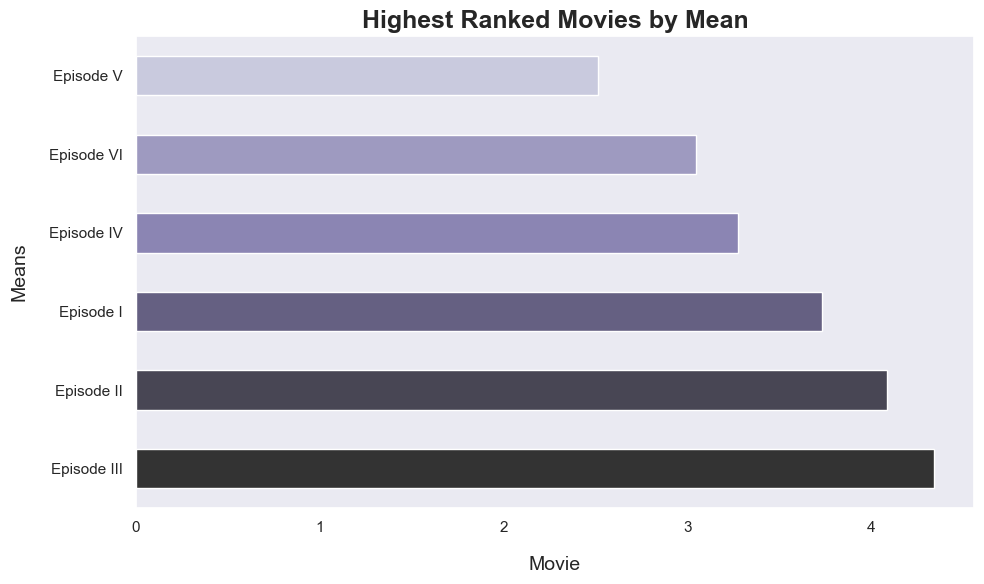

In [27]:
# Calculate the mean ranking for each movie
means = star_wars[star_wars.columns[9:15]].mean()

# Creat a dataframe for sorting and plotting
means_df = means.reset_index()
means_df.columns = ['Movie', 'Mean']
means_df['Movie'] = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

# Sort the ratings in ascending order
means_df.sort_values('Mean', ascending=True, inplace=True)

# Adjust theme
sns.set_theme(style='dark')

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=means_df,
           x='Mean',
           y='Movie',
           hue='Mean',
           palette='Purples_d',
           legend=False,
           width=0.5,
           edgecolor='white')

# Customize labels and title
plt.xlabel('Movie', labelpad=15, fontsize=14)
plt.ylabel('Means', labelpad=15, fontsize=14)
plt.title('Highest Ranked Movies by Mean', weight='bold', fontsize=18)

#Improve layout and display
plt.tight_layout()
plt.show()

#### Analysis of Star Wars Ranked Movies Based on the Mean
The bar plot above indicates the ranking of the 6 episodes of Star Wars movies based on their mean.
- Episode V has the least mean of 2.51
- Episode VI has follows the least means with a a mean of 3.04
- Episode III has the highest mean of all the six movies.

From the above insights we can deduce that the audience preference is aligned towards the original movies than to the new comers. This is indicated by the threshold of lowest mean being the most prefered movie. In this case the movie; **The Empire Strikes Back** stands out as the favourite while **Revenge of the Sith** is the least favourite based on its mean of 4.34.

# Star Wars Most Viewed Movie

In [30]:
# Finding the total view count for each movie
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [31]:
# Creat a dataframe for sorting and plotting
sum_seen = star_wars[star_wars.columns[3:9]].sum()
sum_df = sum_seen.reset_index()
sum_df.columns = ['Movies', 'Sum']
sum_df['Movies'] = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
print(sum_df)

        Movies  Sum
0    Episode I  673
1   Episode II  571
2  Episode III  550
3   Episode IV  607
4    Episode V  758
5   Episode VI  738


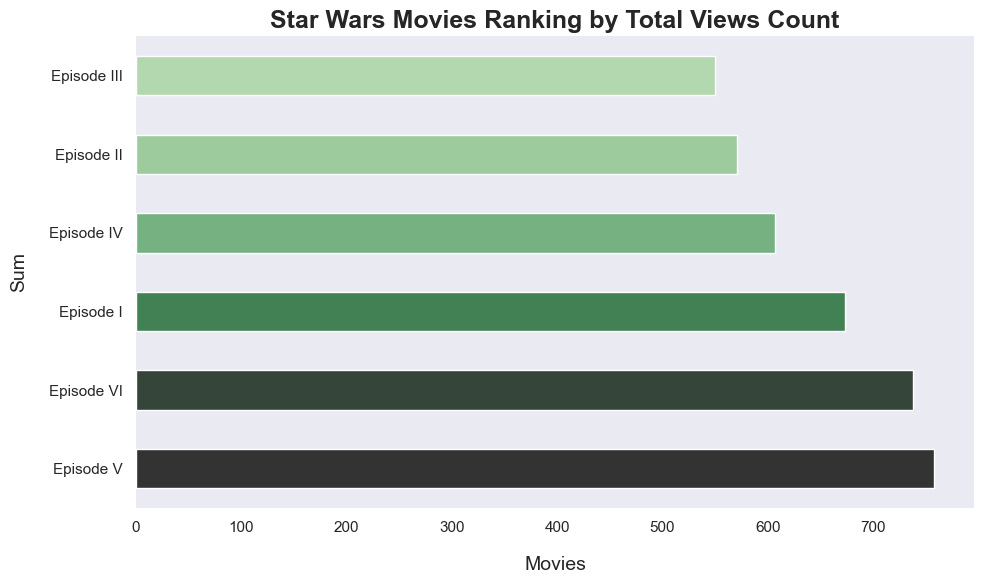

In [32]:
# Sort the sum in ascending order
sum_df.sort_values('Sum', ascending=True, inplace=True)

# Adjust theme
sns.set_theme(style='dark')

# Creat the bar plot
plt.figure(figsize=(10,6))

sns.barplot(data=sum_df, 
            x='Sum', 
            y='Movies', 
            hue='Sum',
           legend=False,
           palette='Greens_d',
           width=0.5)

# Customize the plot appearance
sns.despine(left=True, bottom=True, right=True, top=True)

# Customize labels and title
plt.xlabel('Movies', labelpad=15, fontsize=14)
plt.ylabel('Sum', labelpad=15, fontsize=14)
plt.title('Star Wars Movies Ranking by Total Views Count', weight='bold', fontsize=18)

#Improve layout and display
plt.tight_layout()
plt.show()

#### Analysis of Star Wars Movies Based on the Sum of Viewership

- **Episode V: The Empire Strikes Back**  is the most viewed movie among the six movies with a total of 738 total vieweship. This finding corresponding to our earlier analysis on ranking based on average where this same episode was highly ranked.
- **Episode VI: Return of the Jedi** and Episode I also have most viewership compared to **Episode III: Revenge of the Sith**, **Episode II: Attack of the Clones**, and **Episode IV: A New Hope**.

Our conclusion therefore is that the original movies are highly ranked hence highly viewed than the newer movies.

# Exploring the Data by Binary Segments

There are several columns that segments our data into two groups. Below, we will split a DataFrame into two groups based on a binary columns by creating two subsets of that column.

## The Highest Ranked and Viewed Movie by Gender

In [37]:
def star_wars_comparison_analysis(set1, set2, label1, label2, col_title):
    '''
    A helper function to visualize the binary datasets
    on a single plot side by side for simple comparison
    and analysis
    '''
    
    # Calculate the sum total of views for each set
    set1_sum_seen = set1.iloc[:, 3:9].sum()
    set2_sum_seen = set2.iloc[:, 3:9].sum()

    # Calculate the average ranking for each set
    set1_mean_ranking = set1.iloc[:, 9:15].mean()
    set2_mean_ranking = set2.iloc[:, 9:15].mean()

    # Descrive movie labels
    movies = ['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI']

    # Positions and widht for the bars
    x= np.arange(6) # 6 x-axis positions for the 6 movies
    width = 0.30

    # Create figure and axis for both average ranking and total view counts
    fig, ax = plt.subplots(2,1, figsize=(14, 10))

    # Plot total view counts bar with shiftings
    ax[0].bar(x - width/2, set1_sum_seen, width, label=label1) #x - width/2 shifts bar to the left of the central position of x-axis 
    ax[0].bar(x + width/2, set2_sum_seen, width, label=label2) #x + width/2 shifts bar to the right of the central position of x-axis

    # Customizing the plots
    ax[0].set_title(f'Star Wars Total Movies Seen by {col_title}', weight='bold', fontsize=15)
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(movies, weight='bold')
    ax[0].set_ylabel('Sum', labelpad=15)
    ax[0].legend(loc='upper right')

    # Plot average rankings
    ax[1].bar(x - width/2, set1_mean_ranking, width, label=label1) #x - width/2 shifts bar to the left of the central position of x-axis 
    ax[1].bar(x + width/2, set2_mean_ranking, width, label=label2) #x + width/2 shifts bar to the right of the central position of x-axis

    # Customizing the plots
    ax[1].set_title(f'Star Wars Average Ranking by {col_title}', weight='bold', fontsize=15)
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(movies, weight='bold')
    ax[1].set_ylabel('Mean', labelpad=15)
    ax[1].legend(loc='upper right')

    # Display the plot
    plt.show()

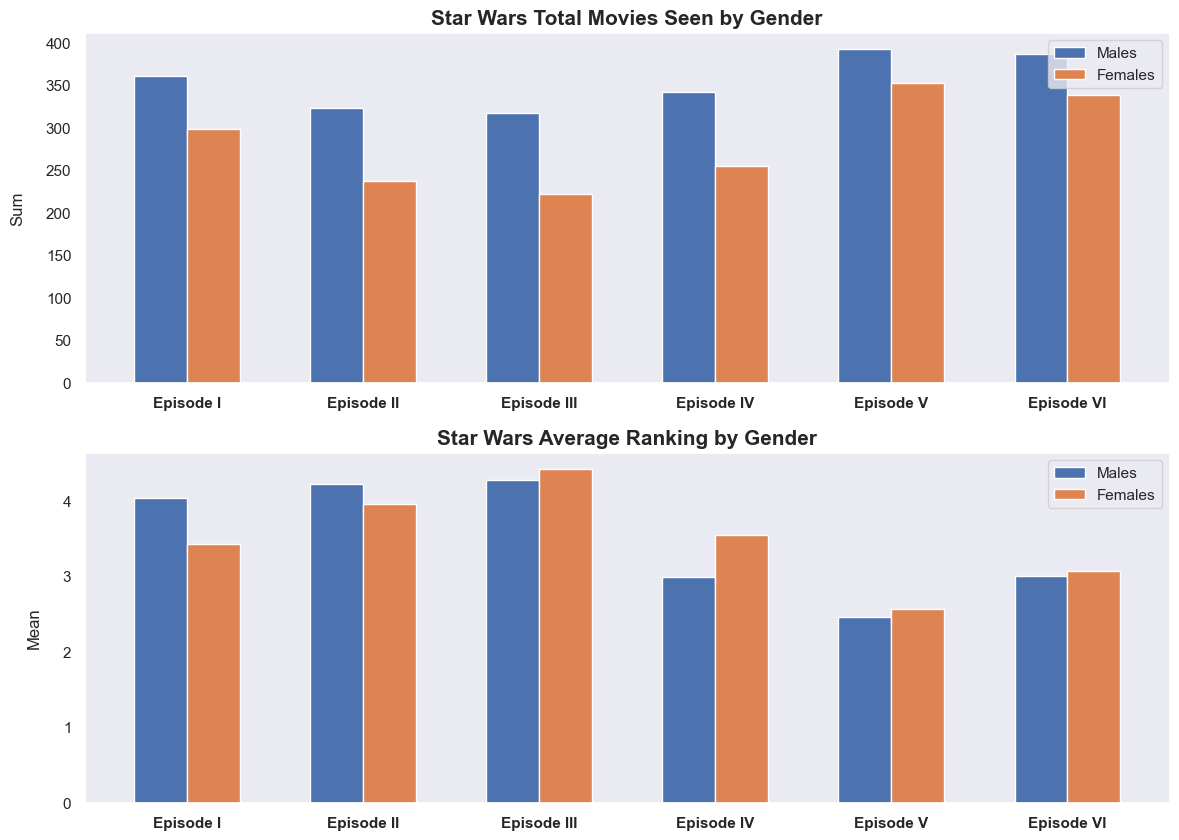

In [38]:
# Comparison between males and females
males_df = star_wars[star_wars['Gender'] == 'Male']
females_df = star_wars[star_wars['Gender']== 'Female']
star_wars_comparison_analysis(males_df, females_df, 'Males', 'Females', 'Gender')

In [39]:
def gender_summary(set_1_df, set_2_df):
    """
    A function to summarize:
    - Total view count for males and females
    - Total average ranking for males and females
    """
    
    # Total View Count for Males and Females
    print("Total View Count for Males")
    male_seen = set_1_df[set_1_df.columns[3:9]].sum()
    print(male_seen)
    
    print("\nTotal View Count for Females")
    female_seen = set_2_df[set_2_df.columns[3:9]].sum()
    print(female_seen)
    
    # Total Average Ranking for Males and Females
    print("\nTotal Average Ranking for Males")
    male_average = set_1_df[set_1_df.columns[9:15]].mean()
    print(male_average)
    
    print("\nTotal Average Ranking for Females")
    female_average = set_2_df[set_2_df.columns[9:15]].mean()
    print(female_average)

In [40]:
# Display the summary for both view counts and average ratings (Males & Females)
gender_summary(males_df, females_df)

Total View Count for Males
seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

Total View Count for Females
seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

Total Average Ranking for Males
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

Total Average Ranking for Females
ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


#### Analysis of Star Wars Viewership Based on Gender

##### 1. Most Viewed Movies
From the analysis and visualizations above, it is clear that total vieweship is high among male audience than female audience. Even though _Episode V: The Empire Strikes Back_ is the most viewed episode by both genders, male audience supercedes the females audience by more than 30; (392 against 353). _Episode III: Revenge of the Sith_ still remains to be the least viewed episode by both genders.

##### 2. Most Ranked Movies
From the analysis the movie with the lowest average value is considered to be most ranked movie among the six episodes. Episode V still receives the highest ranking from both genders (lowest value). _Episode I: The Phantom Menace_ and _Episode II: Attack of the Clones_ were highly ranked among female audience than male audience.

In conclusion, the analysis gives us a profound insight among the gender because we see a trend where total viewership is high among males than females and on the flip side, the ranking is high among females than males. This trende indicates the perception of both genders to the Star Wars movie franchise.

## Comparison Between Star Wars and Non Star Wars Fans

In [43]:
# Filter dataset to have a clear comparison of Star Wars fans and non-fans
star_wars_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
star_wars_non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

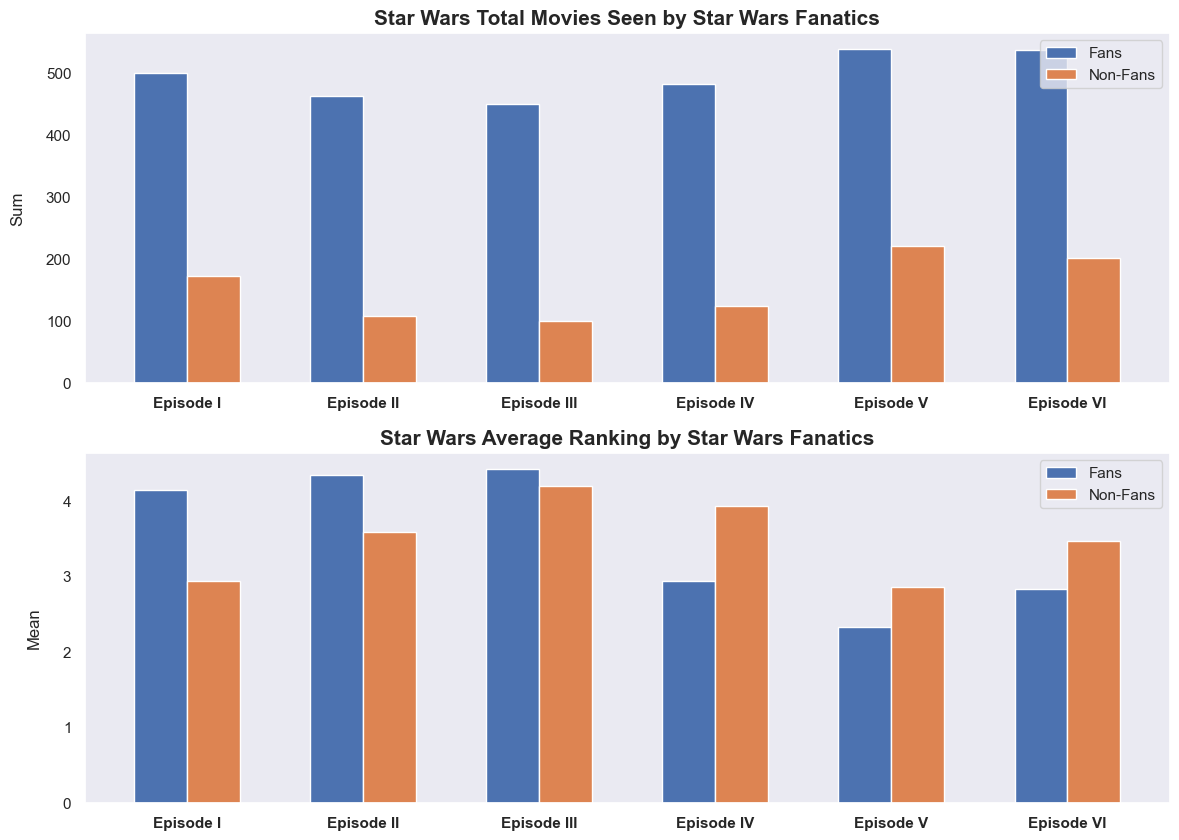

In [44]:
star_wars_comparison_analysis(star_wars_fans, star_wars_non_fans, 'Fans', 'Non-Fans', 'Star Wars Fanatics')

In [45]:
def fanship_summary(set_1_df, set_2_df):
    """
    A function to summarize:
    - Total view count for Fans and Non-Fans
    - Total average ranking for Fans and Non-Fans
    """
    
    # Total View Count for Fans and Non-Fans
    print("Total View Count for Fans")
    fans_seen = set_1_df[set_1_df.columns[3:9]].sum()
    print(fans_seen)
    
    print("\nTotal View Count for Non-Fans")
    non_fans_seen = set_2_df[set_2_df.columns[3:9]].sum()
    print(non_fans_seen)
    
    # Total Average Ranking for Fans and Non-Fans
    print("\nTotal Average Ranking for Fans")
    fans_average = set_1_df[set_1_df.columns[9:15]].mean()
    print(fans_average)
    
    print("\nTotal Average Ranking for Non-Fans")
    non_fans_average = set_2_df[set_2_df.columns[9:15]].mean()
    print(non_fans_average)

In [46]:
# Display the summary for both view counts and average ratings 
# (Star Wars fans and non-fans)
fanship_summary(star_wars_fans, star_wars_non_fans)

Total View Count for Fans
seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64

Total View Count for Non-Fans
seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64

Total Average Ranking for Fans
ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64

Total Average Ranking for Non-Fans
ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


#### Analysis of Star Wars Viewership Based on Fanship

##### 1. Most Viewed Movies
The total view count for both Star Wars fans and non fans still shows that Episode V: The Empire Strikes Back is the most watched movie. Though the difference of viewership count between fans and non-fans is high (which is expected), the audience who are not much aligned to the franchise still rates _The Empire Strikes Back_ to be the most favourite movie to watch among the six movies. This is followed closely by Episode VI as the most favourite movie. The least favourite movie still remains to be Episode III and this cuts across both fans and non-fans.

##### 2. Most Ranked Movies
Episode V still remains to be the most ranked movie of all, this is expected as it is the most viewed/favourite movie for both the franchise fan-base and non-fans. There is also an interesting trend where non star wars fans highly rank _Episode I: The Phantom Menace and Episode_ than the star wars fan-base

## Comparison Between Star Trek and Non Star Trek Fans

In [49]:
# Filter dataset to have a clear comparison of Star Trek fans and non-fans
star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True]
star_trek_non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == False]

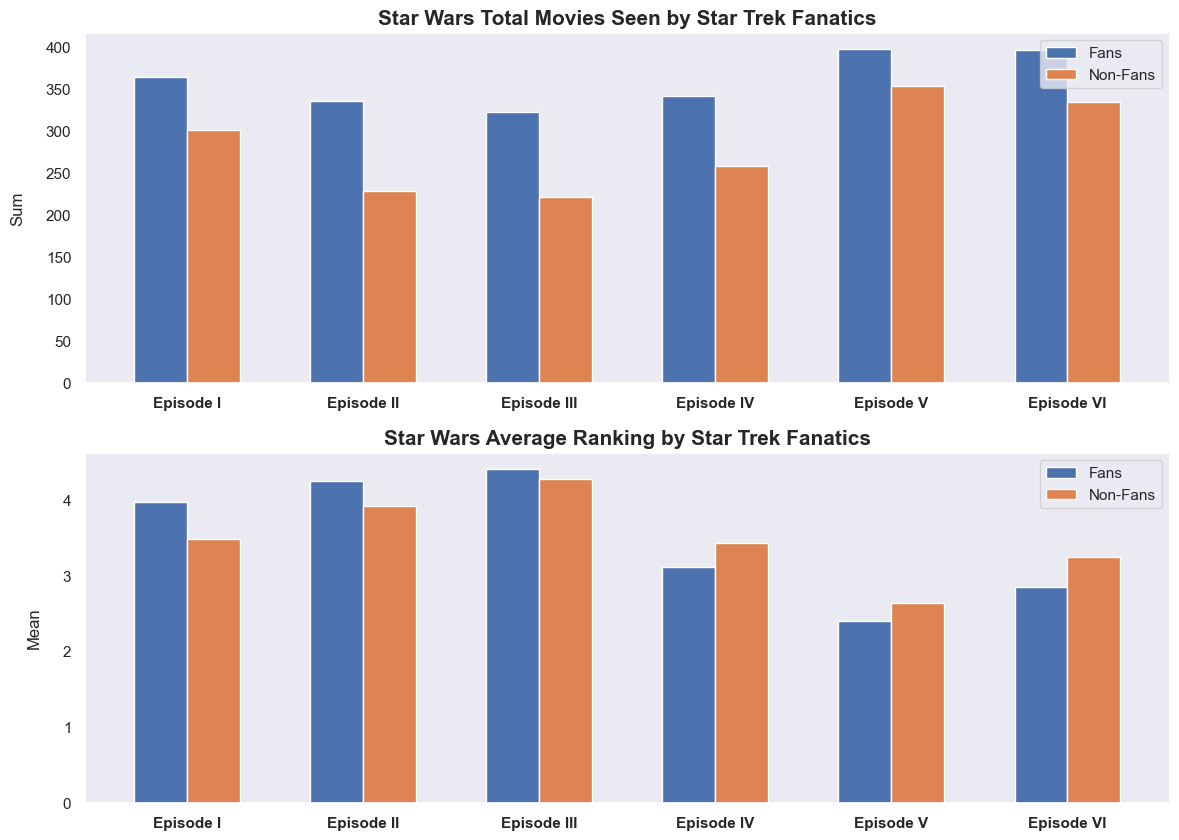

In [50]:
star_wars_comparison_analysis(star_trek_fans, star_trek_non_fans, 'Fans', 'Non-Fans', 'Star Trek Fanatics')

In [51]:
def fanship_summary(set_1_df, set_2_df):
    """
    A function to summarize:
    - Total view count for Fans and Non-Fans
    - Total average ranking for Fans and Non-Fans
    """
    
    # Total View Count for Fans and Non-Fans
    print("Total View Count for Fans")
    fans_seen = set_1_df[set_1_df.columns[3:9]].sum()
    print(fans_seen)
    
    print("\nTotal View Count for Non-Fans")
    non_fans_seen = set_2_df[set_2_df.columns[3:9]].sum()
    print(non_fans_seen)
    
    # Total Average Ranking for Fans and Non-Fans
    print("\nTotal Average Ranking for Fans")
    fans_average = set_1_df[set_1_df.columns[9:15]].mean()
    print(fans_average)
    
    print("\nTotal Average Ranking for Non-Fans")
    non_fans_average = set_2_df[set_2_df.columns[9:15]].mean()
    print(non_fans_average)

In [52]:
# Display the summary for both view counts and average ratings 
# (Star Trek fans and non-fans)
fanship_summary(star_trek_fans, star_trek_non_fans)

Total View Count for Fans
seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64

Total View Count for Non-Fans
seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64

Total Average Ranking for Fans
ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64

Total Average Ranking for Non-Fans
ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
ranking_4    3.433414
ranking_5    2.634383
ranking_6    3.244552
dtype: float64


#### Analysis of Star Trek Viewership Based on Fanship

##### 1. Most Viewed Movies
Episove V and Episode VI are the most viewed movies by Star Trek fan respectively. This pattern is the same also to non Star Trek fans. The least favourite movie is _Revenge of the Sith (Episode III)_. This episode is also least favourite to Star Wars fans as seen in our earlier analysis.

##### 2. Most Ranked Movies
The most ranked movies (ranking with the least mean) is Episode V. This ranking cuts across both Star Trek fans and non fans. The least ranked movie is Episode III which is expected because it is the movie with the least view counts among the fans and non-fans.

Generally we can conclude that Star Trek fans also rank Star Wars movies significantly which reflects a stronger preference to the movie franchise.

# Star Wars Analysis Based on Education Level

In [55]:
# Displaying the value counts for each education level
star_wars['Education'].value_counts()

Education
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: count, dtype: int64

In [56]:
education_levels = ['Some college or Associate degree',
                   'Bachelor degree',
                   'Graduate degree',
                   'High school degree',
                   'Less than high school degree']

# Mapping the ranking columns to Episodes
mapper = {'ranking_1': 'Episode I',
         'ranking_2': 'Episode II',
         'ranking_3': 'Episode III',
         'ranking_4': 'Episode IV',
         'ranking_5': 'Episode V',
         'ranking_6': 'Episode VI'}

# Group the data by Education and aggregate numeric columns by mean
rankings_edu = star_wars.groupby('Education').mean(numeric_only=True)

# Rename the ranking columns to Episodes
rankings_edu = rankings_edu[rankings_edu.columns[8:14]].rename(columns=mapper)

# Drop the less than high school degree due to low respondent number
rankings_edu = rankings_edu.drop('Less than high school degree', axis=0)
rankings_edu

,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI
Education,,,,,,
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


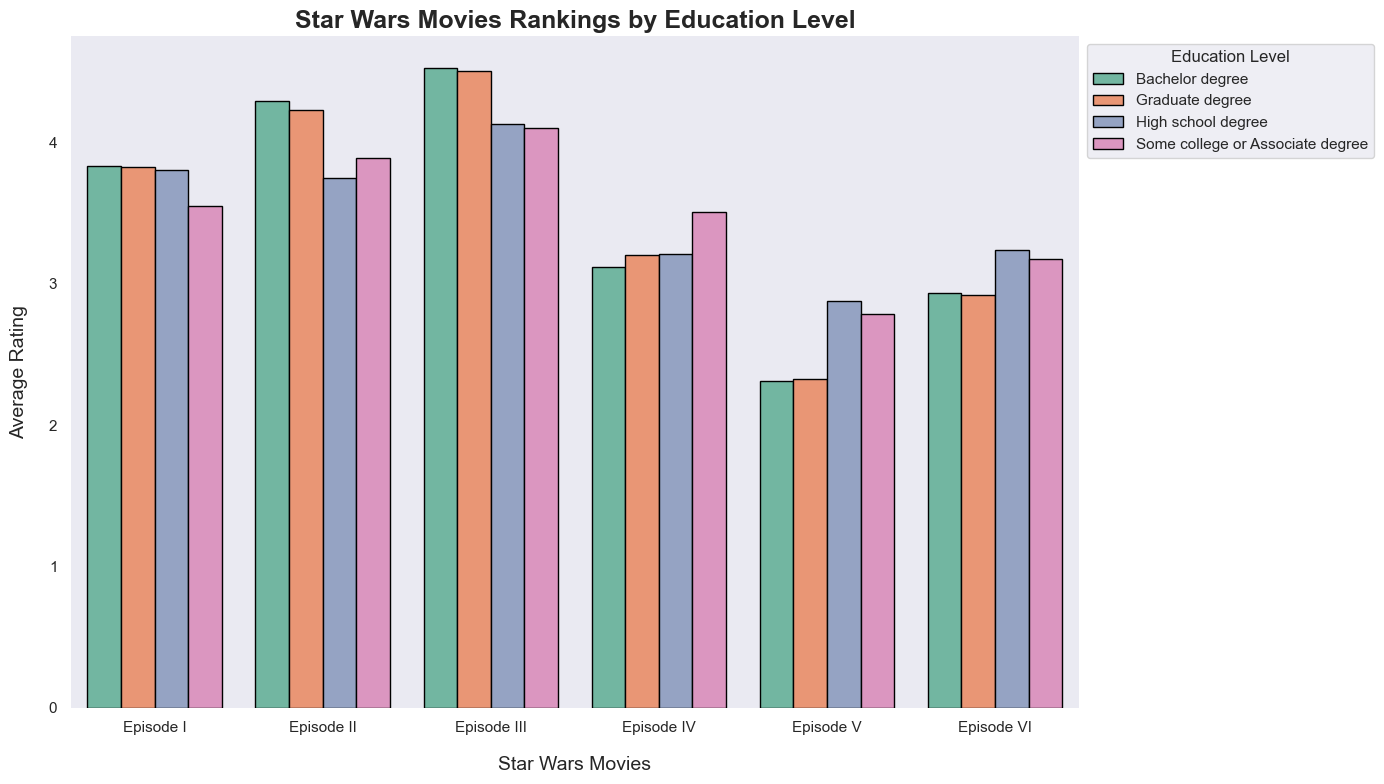

In [57]:
melted_rankings_edu = pd.melt(rankings_edu.reset_index(), 
                    id_vars=['Education'], 
                    value_vars=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], 
                    var_name = 'Movies', 
                    value_name='Mean')

# Adjust theme
sns.set_theme(style='dark', palette='pastel')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=melted_rankings_edu, 
    x='Movies', 
    y='Mean', 
    hue='Education', 
    palette='Set2', 
    edgecolor='black'
)

# Customize the plot appearance
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel('Star Wars Movies', labelpad=15, fontsize=14)
plt.ylabel('Average Rating', labelpad=15, fontsize=14)
plt.title('Star Wars Movies Rankings by Education Level', weight='bold', fontsize=18)

# Customize legend
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')

# Improve layout
plt.tight_layout()
plt.show()

#### Analysis of Star Wars Viewership Based on Education Level
Just like the subsequent analysis on movie ranking, the movie with the lowest average is the most ranked movie. The analysis above entails how the four levels of education categories ranked the six episodes of the Star Wars movies. Episode V is the most ranked movie among all the levels of education, followd closely by Episode VI and Episode IV respectively. A closer look also indicates that higher education level i.e._Bachelor degree_ and _Graduate degree_ highly rank the 3 best Episodes compared the lower education level. On the flip side, Episode III still resurfaces as the least ranked episode amongst all. This ranking cuts across both the higher and the lower education levels.

# Star Wars Analysis Based on Geographic Location

In [60]:
# Displaying the value counts for each location
star_wars['Location (Census Region)'].value_counts(dropna=False)

Location (Census Region)
East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: count, dtype: int64

In [61]:
#Drop the null values
star_wars = star_wars.dropna(subset=['Location (Census Region)'])

In [62]:
# # Mapping the seen columns to Episodes
mapper = {'seen_1': 'Episode I',
         'seen_2': 'Episode II',
         'seen_3': 'Episode III',
         'seen_4': 'Episode IV',
         'seen_5': 'Episode V',
         'seen_6': 'Episode VI'}

# Group the data by Location (Census Region) and aggregate numeric columns by sum
loc_view_counts = star_wars.groupby('Location (Census Region)').sum(numeric_only=True)

# Rename the seen columns to Episodes
loc_view_counts = loc_view_counts[loc_view_counts.columns[2:8]].rename(columns=mapper)
loc_view_counts

,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI
Location (Census Region),,,,,,
East North Central,102,89,89,95,128,121
East South Central,24,21,21,27,31,29
Middle Atlantic,79,69,70,76,83,85
Mountain,57,47,46,54,61,59
New England,50,44,43,48,55,54
Pacific,120,99,92,105,123,124
South Atlantic,104,82,79,93,125,120
West North Central,61,51,49,49,67,63
West South Central,62,58,50,49,70,69


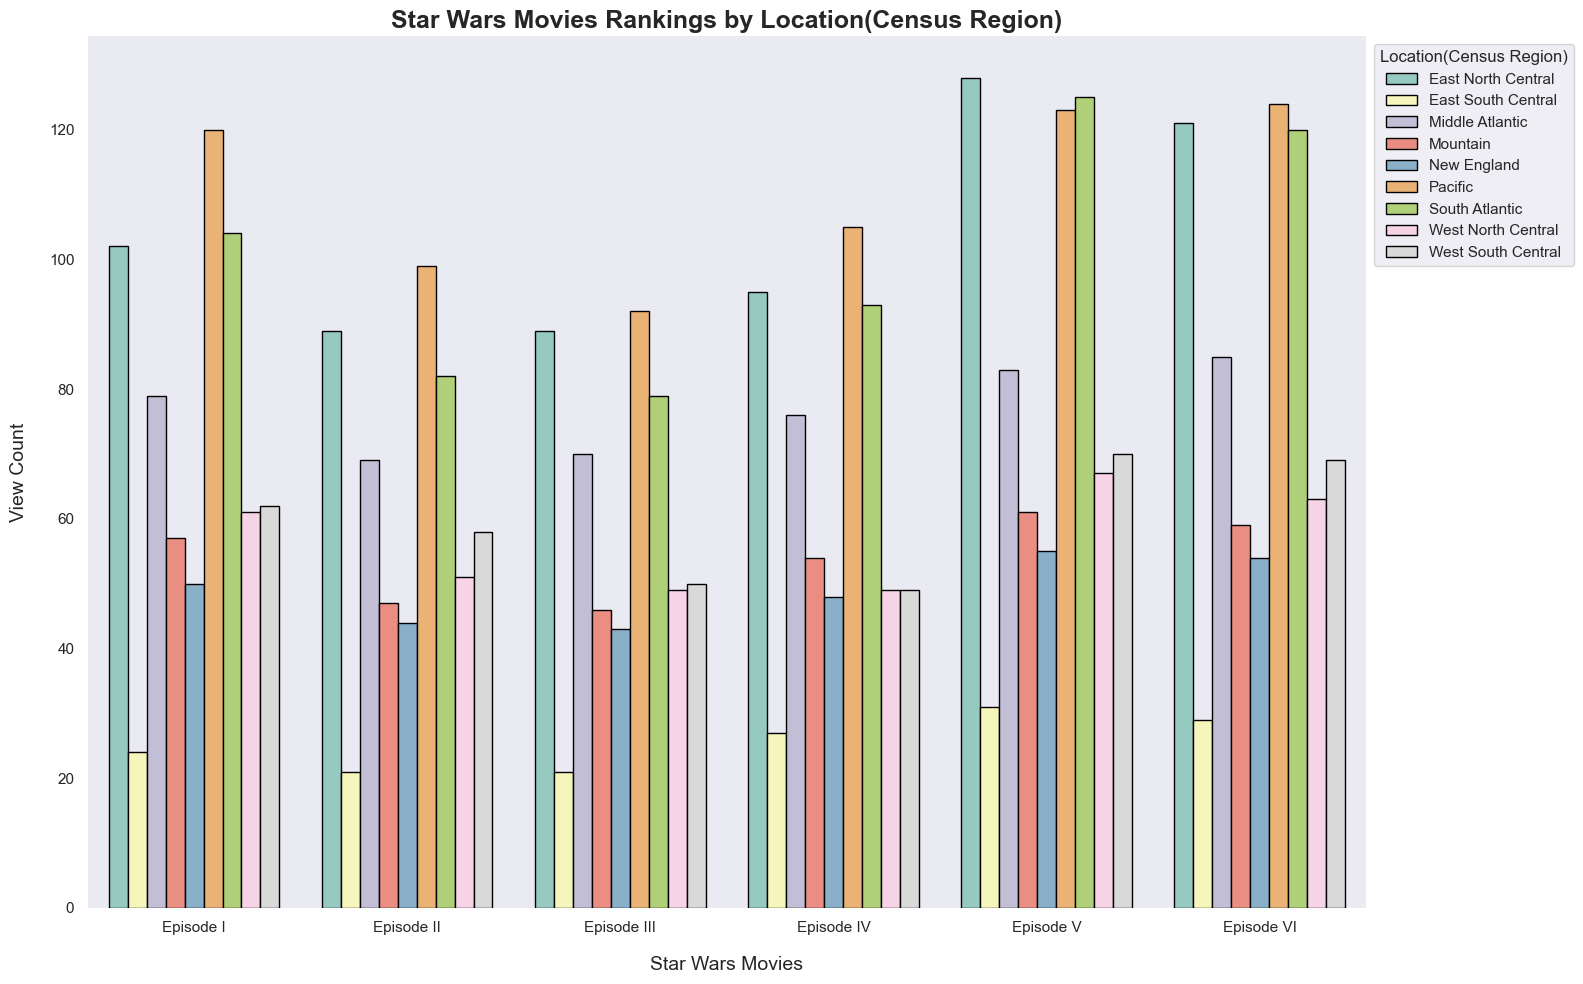

In [63]:
# Melt the loc_view_counts df for easy plotting using Seaborn
melted_loc_view_counts = pd.melt(loc_view_counts.reset_index(), 
                                 id_vars=['Location (Census Region)'],
                                value_vars=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'],
                                var_name='Movies',
                                value_name='View Counts')
# Adjust theme
sns.set_theme(style='dark', palette='colorblind')

# Create the bar plot
plt.figure(figsize=(16,10))

sns.barplot(melted_loc_view_counts,
           x='Movies',
           y='View Counts',
           hue='Location (Census Region)',
           palette='Set3',
           edgecolor='black')

# Customize the plot appearance
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel('Star Wars Movies', labelpad=15, fontsize=14)
plt.ylabel('View Count', labelpad=15, fontsize=14)
plt.title('Star Wars Movies Rankings by Location(Census Region)', weight='bold', fontsize=18)

# Customize legend
plt.legend(title='Location(Census Region)', bbox_to_anchor=(1, 1), loc='upper left')

# Enhance the display
plt.tight_layout()
plt.show()

#### Analysis of View Count by Location
|Location|Episode V|Episode VI|Episode I|
|--------|-------|----------|-----------|
|Pacific|123|124|120|
|East North Central|127|120|101|
|South Atlantic|124|119|103|

Out of the 9 locations, 3 have been singled out (Pacific, East North Central and South Atlantic) based on the high total view counts of the Star Wars movies. East North Central region has a higher viewership of Episode V which so far has been the most viewed movie across different categories in the entire franchise. South Atlantic and Pacific follow closely in regards to audience vieweship of this episode. Episode VI attracts a high viewership Pacific more than the other region. An interesting trend has been a high view count of _Episode I: The Phantom Menace_ which also attracted high vieweship in the Pacific region than any other region.
In general, Pacific region has the highest number of viewership compared to the other regions, this is indicative that this region has the most audience who are aligned to Star Wars movie franchise.

# Conclusion

The aim of our analysis was to find out whether  _The Empire Strikes Back_(Episode V) was clearly the best of the bunch. We analysed the six episodes of the Star Wars franchise to demistify whether this mystery was a reality or just a wish. We segmented the data into different audience groups and analysed vis-a-vis the most viewed and the most ranked episode. The dorminant preference among the different audience groups was _The Empire Strikes Back_ which is Episode V. This movie is highly preferred even by Star Trek franchise fans. The findings by no means demistyfies the conundrum on the most ranked movie in the franchise before the launh of  _Star Wars: The Force Awakens_. There is however room for further analysis to determine data on the characters respondents view favorably and unfavorably.
Which character do respondents like the most?
Which character do respondents dislike the most?
Which character is the most controversial (split between likes and dislikes)?